# Variogram Point Cloud



## Prerequisites

- **Domain**:
  - understanding what are semivariance and covariance of spatial datasets
  - directional variograms
  - scatterplots
- **Package**:
  - installation
  - `ExperimentalVariogram` class
- **Programming**:
  - Python basics

## Table of contents

1. Load and visualize input data.
2. Create omnidirectional `VariogramCloud` object with multiple lags.
3. Create omnidirectional `VariogramCloud` object with few lags.
4. Transform `VariogramCloud` into `ExperimentalVariogram`.
5. Create directional `VariogramCloud`.

In [14]:
import geopandas as gpd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from pyinterpolate import ExperimentalVariogram, VariogramCloud

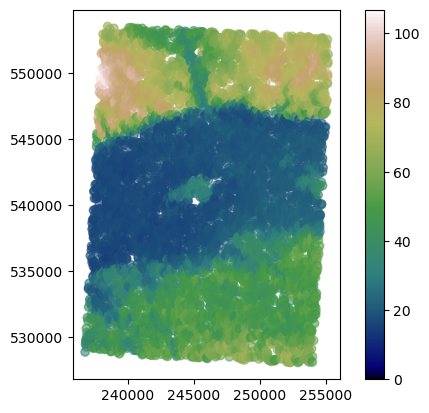

In [2]:
df = pd.read_csv(
    'data/dem.csv'
)
# Populate geometry column and set CRS

dem_geometry = gpd.points_from_xy(x=df['longitude'], y=df['latitude'], crs='epsg:4326')
dem = gpd.GeoDataFrame(df, geometry=dem_geometry)

# Transform crs to metric values
dem.to_crs(epsg=2180, inplace=True)
dem.plot(column='dem', cmap='gist_earth', alpha=0.6, vmin=0, legend=True);

## Omnidirectional - multiple lags

In [3]:
MAX_RANGE = 10_000
STEP_SIZE = 50

In [4]:
vc = VariogramCloud(ds=dem[['geometry', 'dem']], step_size=STEP_SIZE, max_range=MAX_RANGE)

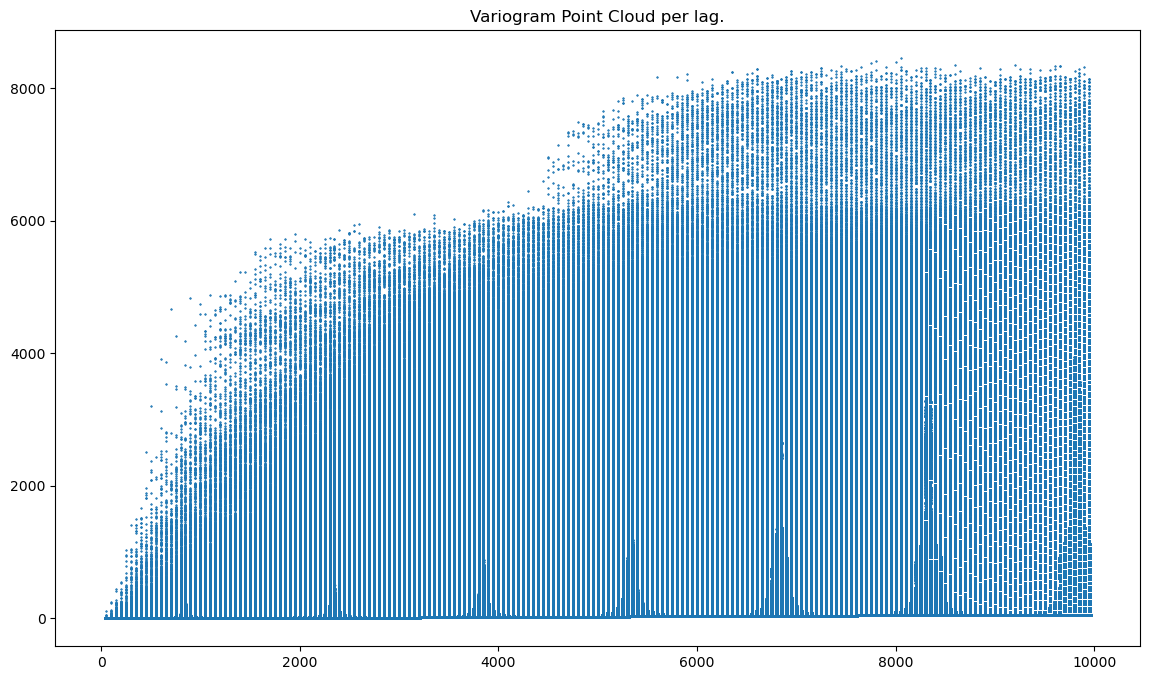

True

In [5]:
vc.plot(kind='scatter')

## Omnidirectional - few lags

In [6]:
MAX_RANGE = 10_000
STEP_SIZE = 900

In [7]:
vc = VariogramCloud(ds=dem[['geometry', 'dem']], step_size=STEP_SIZE, max_range=MAX_RANGE)

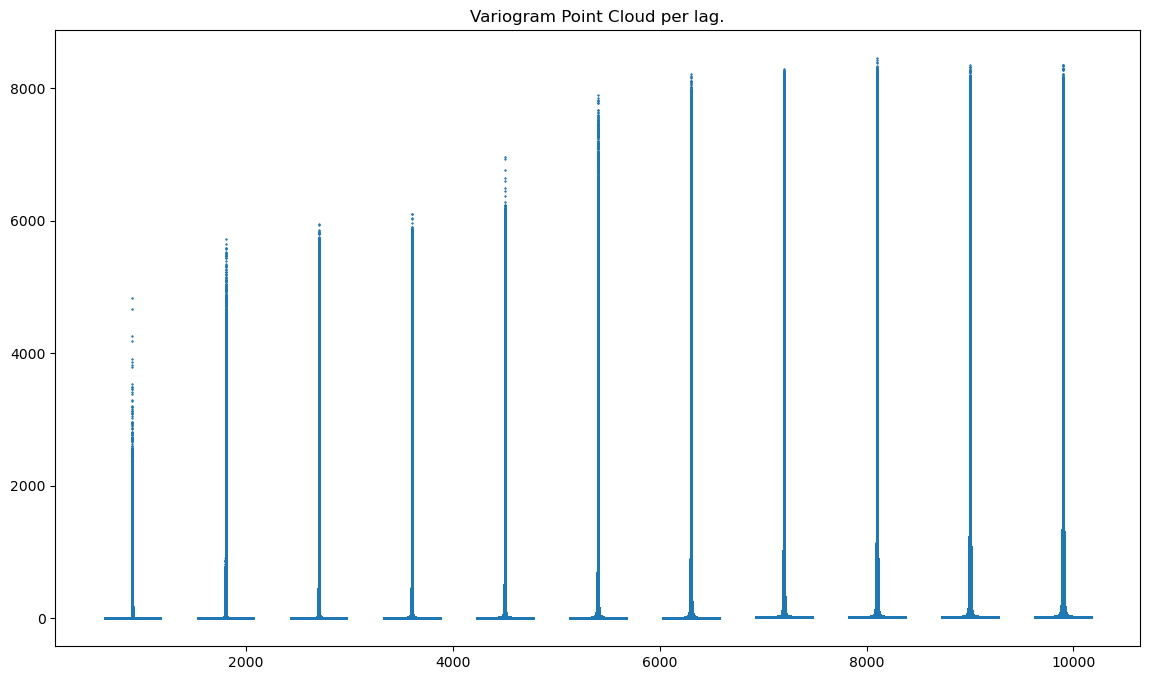

True

In [8]:
vc.plot(kind='scatter')

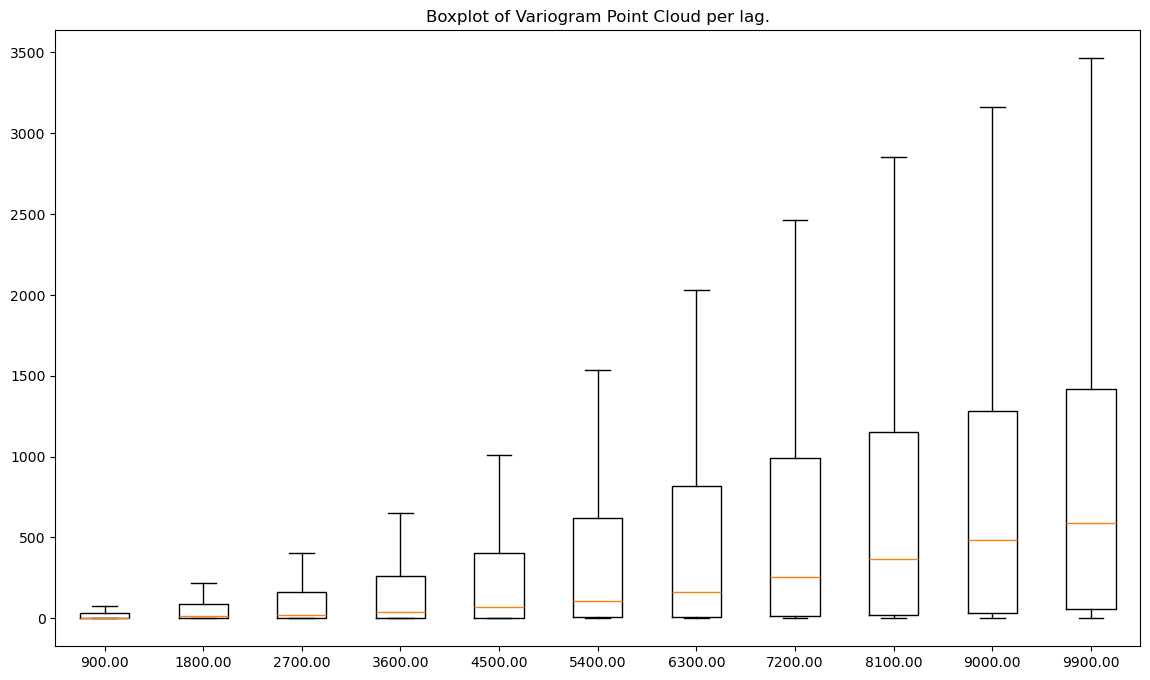

True

In [9]:
vc.plot(kind='box')

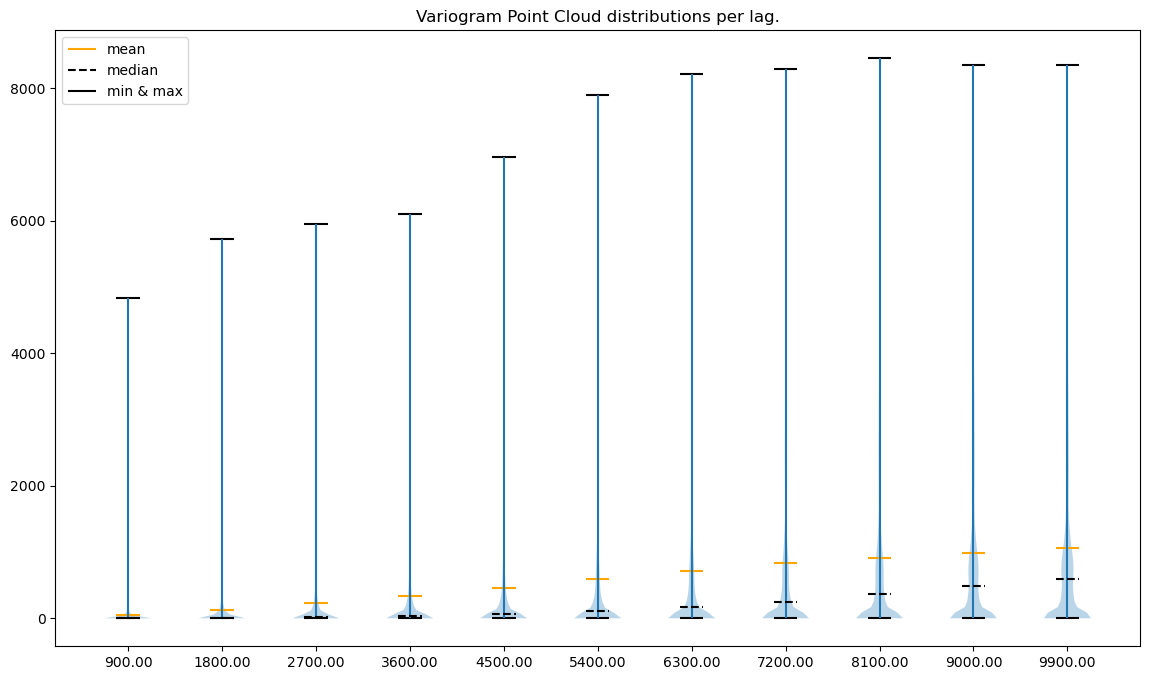

True

In [10]:
vc.plot(kind='violin')

## Variogram Cloud vs Experimental Variogram

In [11]:
evar = ExperimentalVariogram(
    ds=dem[['geometry', 'dem']],
    step_size=STEP_SIZE,
    max_range=MAX_RANGE
)

evar_values = evar.semivariances

In [12]:
# Prepare scatter plot values
scatter_xs = []
scatter_ys = []

for lag, values in vc.semivariances.items():
    scatter_ys.extend(values)
    scatter_xs.extend([lag for _ in values])

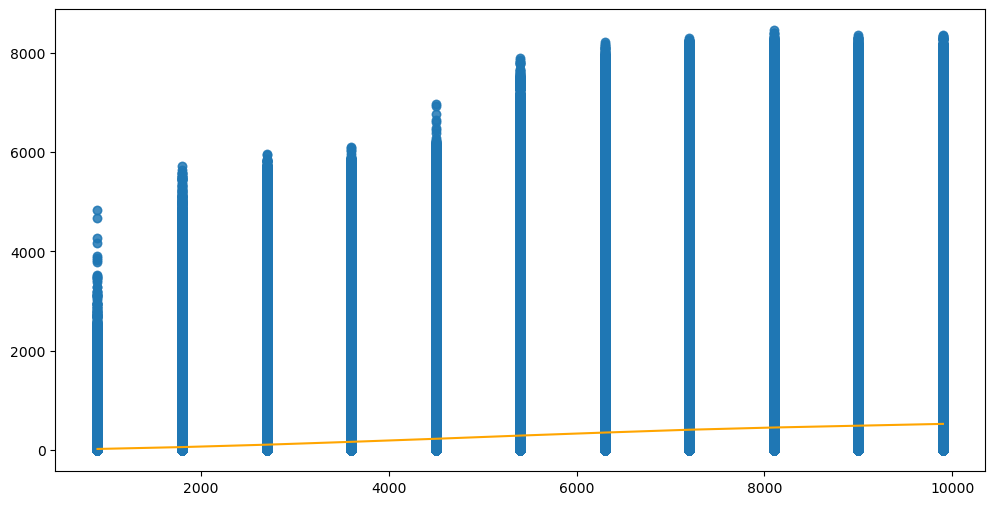

In [13]:
plt.figure(figsize=(12, 6))
plt.scatter(x=scatter_xs, y=scatter_ys, alpha=0.6)
plt.plot(evar.lags, evar.semivariances, c='orange')
plt.show()

In [17]:
# Prepare scatter plot values
scatter_xs_mean = []
scatter_ys_mean = []

for lag, values in vc.semivariances.items():
    scatter_ys_mean.append(np.mean(values) / 2)
    scatter_xs_mean.append(lag)

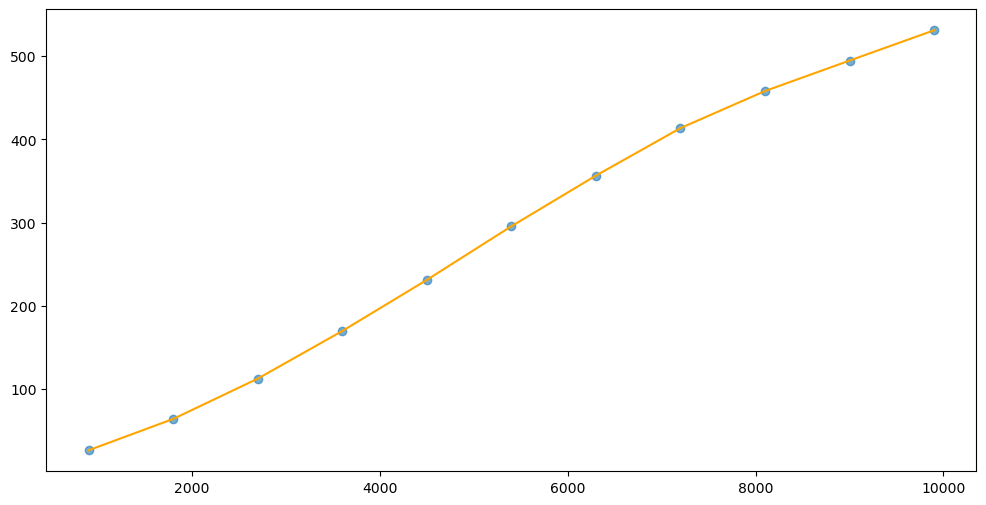

In [18]:
plt.figure(figsize=(12, 6))
plt.scatter(x=scatter_xs_mean, y=scatter_ys_mean, alpha=0.6)
plt.plot(evar.lags, evar.semivariances, c='orange')
plt.show()

## Directional

In [19]:
vc = VariogramCloud(
    ds=dem[['geometry', 'dem']],
    step_size=STEP_SIZE,
    max_range=MAX_RANGE,
    direction=180,
    tolerance=0.2
)

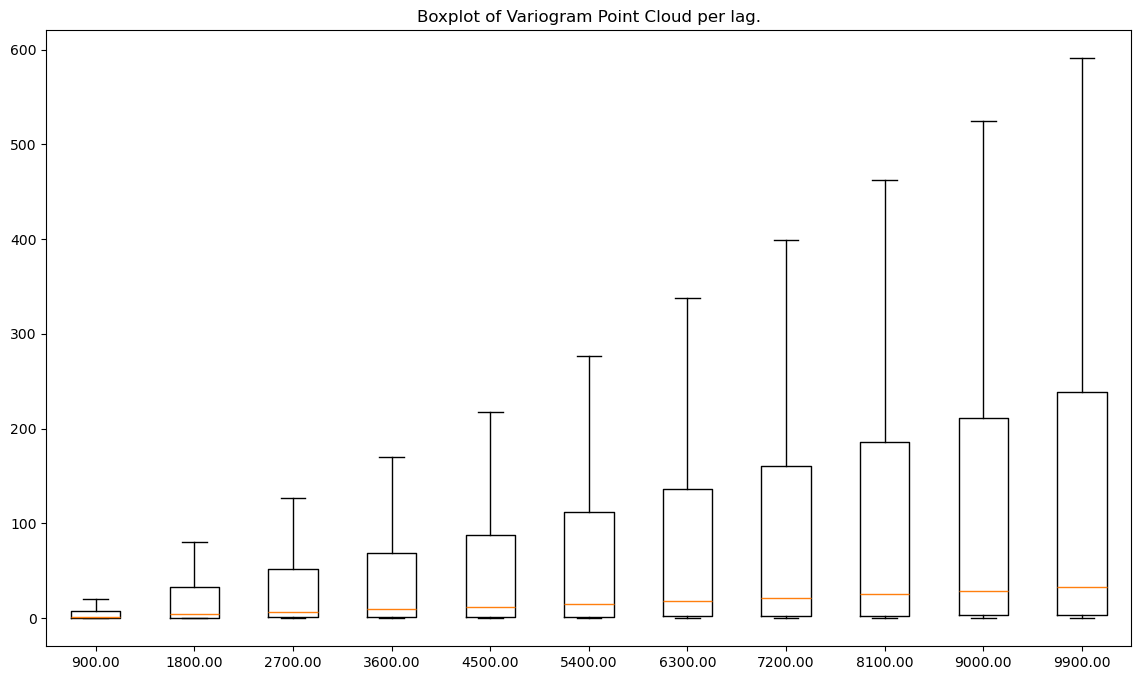

True

In [20]:
vc.plot(kind='box')